In [1]:
#pip install minisom

In [2]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read image and its data

img = plt.imread('Car.jpg')

In [6]:
def imshow(im):
    plt.imshow(im)
    plt.xticks([]) #remove x and y
    plt.yticks([]) #remove x and y
    plt.show()


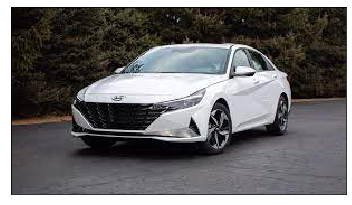

In [7]:
imshow(img)

In [8]:
# image is the combinations of pixels
# pixels are light particles

img.shape

(168, 300, 3)

#### True color image --> Color same as human eye --> RGB

#### Digital Color range 0 - 255 (black - white)
#### RGB make all the colors(combination of RGB)

In [9]:
img

array([[[ 19,  16,   9],
        [ 21,  18,  11],
        [ 23,  20,  13],
        ...,
        [ 25,  20,  14],
        [ 13,   8,   2],
        [ 18,  13,   7]],

       [[ 13,  10,   3],
        [ 15,  12,   5],
        [ 17,  14,   7],
        ...,
        [ 18,  13,   7],
        [ 17,  12,   6],
        [ 29,  24,  18]],

       [[  7,   4,   0],
        [  8,   5,   0],
        [ 10,   7,   2],
        ...,
        [ 27,  22,  16],
        [ 37,  32,  26],
        [ 55,  50,  44]],

       ...,

       [[ 79,  74,  81],
        [ 79,  74,  81],
        [ 79,  74,  81],
        ...,
        [106, 101, 108],
        [106, 101, 108],
        [106, 101, 108]],

       [[ 79,  74,  81],
        [ 79,  74,  81],
        [ 79,  74,  81],
        ...,
        [ 98,  93, 100],
        [ 98,  93, 100],
        [ 98,  93, 100]],

       [[ 79,  74,  81],
        [ 79,  74,  81],
        [ 79,  74,  81],
        ...,
        [102,  97, 104],
        [102,  97, 104],
        [102,  97, 104]]

In [60]:
pixels = np.reshape(img/255,(img.shape[0]*img.shape[1],img.shape[2]))
pixels.shape

(50400, 3)

In [69]:
som =  MiniSom(x=3,y=3,input_len=3,sigma=0.2,learning_rate=0.2)

In [70]:
som.random_weights_init(pixels)

In [71]:
initial_weights = som.get_weights().copy()
initial_weights

array([[[0.5254902 , 0.63137255, 0.69803922],
        [0.48235294, 0.47843137, 0.50196078],
        [0.04705882, 0.04313725, 0.0627451 ]],

       [[0.11372549, 0.11764706, 0.05490196],
        [0.2745098 , 0.25490196, 0.27843137],
        [0.43137255, 0.42745098, 0.45098039]],

       [[0.4745098 , 0.45490196, 0.47058824],
        [0.35686275, 0.33333333, 0.34117647],
        [0.14901961, 0.10980392, 0.10196078]]])

In [72]:
som.train_random(pixels,50,verbose=True)

 [ 50 / 50 ] 100% - 0:00:00 left 
 quantization error: 0.09768520522788891


In [73]:
data_qt = som.quantization(pixels)
data_qt

array([[0.06099533, 0.04759124, 0.02679561],
       [0.06099533, 0.04759124, 0.02679561],
       [0.10759244, 0.09844475, 0.06565201],
       ...,
       [0.43137213, 0.42745055, 0.45097991],
       [0.43137213, 0.42745055, 0.45097991],
       [0.43137213, 0.42745055, 0.45097991]])

In [74]:
data_qt.shape

(50400, 3)

In [75]:
k = data_qt.reshape(img.shape)
k.shape

(168, 300, 3)

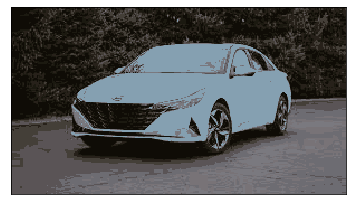

In [76]:
imshow(k)

In [77]:
k.dtype

dtype('float64')